In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,670 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and dire

In [3]:
from matplotlib import font_manager
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [8]:
import pandas as pd

def xlsx_to_csv(input_file, output_file, sheet_name):
    input_data = pd.read_excel(input_file, sheet_name=sheet_name)
    input_data.to_csv(output_file, index=False)

input_file = '/content/DX_0522.xlsx'  # 원본 엑셀 파일 경로
output_file = 'data.csv'  # 변환된 CSV 파일 경로
sheet_name = 'raw'   # 시트 이름 (변경 가능)

xlsx_to_csv(input_file, output_file, sheet_name)

output_file = 'data.csv'
df = pd.read_csv('data.csv')
data = df.iloc[:, 3:40]
print(data)
data_null = pd.DataFrame(data)
null = data_null.isnull().sum()
print(null)

   회사 구분 회사 규모     회사 업종          기업 연매출  상시 근로자수      TYM 매출 비중 응답자 소속 부서  \
0    협력사  중소기업       제조업   4) 50억 ~ 100억   10명 이하         25% 미만        기타   
1    협력사  중소기업       제조업    3) 10억 ~ 50억   50명 이하   51% ~ 75% 미만      경영부서   
2    협력사  중소기업       제조업    3) 10억 ~ 50억   50명 이하         25% 미만        기타   
3    협력사  중소기업       제조업   4) 50억 ~ 100억   50명 이하         25% 미만      경영부서   
4    협력사  중소기업       제조업   4) 50억 ~ 100억   50명 이하         25% 미만      경영부서   
..   ...   ...       ...             ...      ...            ...       ...   
80   딜러점  중소기업  도매 및 소매업    3) 10억 ~ 50억   10명 이하  75% ~ 100% 미만      경영부서   
81   딜러점  중견기업  도매 및 소매업   4) 50억 ~ 100억   10명 이하         25% 미만        기타   
82   협력사  중견기업       제조업  5) 100억 ~ 500억  100명 이상         25% 미만        기타   
83   협력사  중소기업       제조업      6) 500억 이상  100명 이상   51% ~ 75% 미만        기타   
84   딜러점  중소기업  도매 및 소매업    3) 10억 ~ 50억   10명 이하  75% ~ 100% 미만        기타   

   응답자 직위  1.1 목적과 계획의 명확성  1.2 변화관리  ...  5.3 업무 자동화  6.1 고객과의

In [9]:
# List of columns to drop
columns_to_drop = ["상시 근로자수", "응답자 소속 부서", "응답자 직위", "회사 업종"]

# Drop the specified columns
data_cleaned = data.drop(columns=columns_to_drop, errors='ignore')

print(data_cleaned)


   회사 구분 회사 규모          기업 연매출      TYM 매출 비중  1.1 목적과 계획의 명확성  1.2 변화관리  \
0    협력사  중소기업   4) 50억 ~ 100억         25% 미만                2         3   
1    협력사  중소기업    3) 10억 ~ 50억   51% ~ 75% 미만                2         3   
2    협력사  중소기업    3) 10억 ~ 50억         25% 미만                2         2   
3    협력사  중소기업   4) 50억 ~ 100억         25% 미만                2         2   
4    협력사  중소기업   4) 50억 ~ 100억         25% 미만                1         2   
..   ...   ...             ...            ...              ...       ...   
80   딜러점  중소기업    3) 10억 ~ 50억  75% ~ 100% 미만                2         3   
81   딜러점  중견기업   4) 50억 ~ 100억         25% 미만                2         3   
82   협력사  중견기업  5) 100억 ~ 500억         25% 미만                2         2   
83   협력사  중소기업      6) 500억 이상   51% ~ 75% 미만                1         2   
84   딜러점  중소기업    3) 10억 ~ 50억  75% ~ 100% 미만                2         2   

    1.3 경영자 리더십  1.4 디지털화 전담조직  1.5 디지털화 전략  2.1 데이터 관리  ...  5.3 업무 자동화  \
0          

In [10]:
# Extracting columns from index 4 to 33 (5th to 34th columns based on 1-indexing)
numerical_data = data_cleaned.iloc[:, 4:33]

print(numerical_data)

    1.1 목적과 계획의 명확성  1.2 변화관리  1.3 경영자 리더십  1.4 디지털화 전담조직  1.5 디지털화 전략  \
0                 2         3            5              3            2   
1                 2         3            2              1            2   
2                 2         2            2              2            2   
3                 2         2            2              1            2   
4                 1         2            2              1            1   
..              ...       ...          ...            ...          ...   
80                2         3            2              2            2   
81                2         3            5              2            2   
82                2         2            3              1            2   
83                1         2            2              2            2   
84                2         2            2              1            2   

    2.1 데이터 관리  2.2 데이터 품질  2.3 데이터 보안  2.4 데이터 활용도  3.1 자동화 기술  ...  \
0            3           3           3 

In [11]:
from sklearn.preprocessing import LabelEncoder
# 라벨 인코딩
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

print(data_cleaned)

    회사 구분  회사 규모  기업 연매출  TYM 매출 비중  1.1 목적과 계획의 명확성  1.2 변화관리  1.3 경영자 리더십  \
0       1      1       3          0                2         3            5   
1       1      1       2          2                2         3            2   
2       1      1       2          0                2         2            2   
3       1      1       3          0                2         2            2   
4       1      1       3          0                1         2            2   
..    ...    ...     ...        ...              ...       ...          ...   
80      0      1       2          3                2         3            2   
81      0      0       3          0                2         3            5   
82      1      0       4          0                2         2            3   
83      1      1       5          2                1         2            2   
84      0      1       2          3                2         2            2   

    1.4 디지털화 전담조직  1.5 디지털화 전략  2.1 데이터 관리  ...  5.

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


# PCA를 이용한 차원 축소
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_cleaned.drop(columns=data_cleaned.select_dtypes(include=['object']).columns))

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

print(pca_df)


         PC1       PC2
0   3.420564 -0.578993
1  -1.802208  0.273724
2  -0.349408 -1.190964
3   1.283108 -1.793538
4  -3.239004 -1.976679
..       ...       ...
80 -0.794404  0.896892
81  3.558479 -0.509127
82  1.371058 -1.927629
83 -1.098368 -1.211485
84 -0.159195  1.312041

[85 rows x 2 columns]


In [13]:
import numpy as np
# PCA 주성분들이 설명하는 누적 설명 분산 계산
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

print(f'PCA 주성분 1, 2가 설명하는 누적 설명 분산: {explained_variance_ratio_cumulative}')

PCA 주성분 1, 2가 설명하는 누적 설명 분산: [0.46271491 0.54249515]


Cluster counts: {1: 6, 2: 38, 3: 15, 4: 26}
Average Silhouette Score: 0.3456620973213439


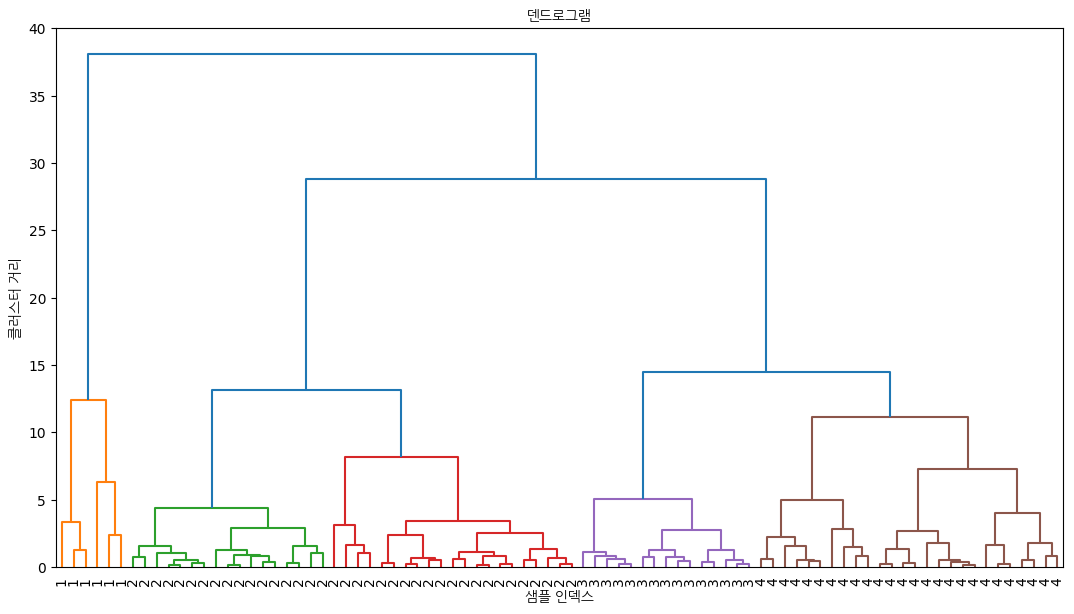

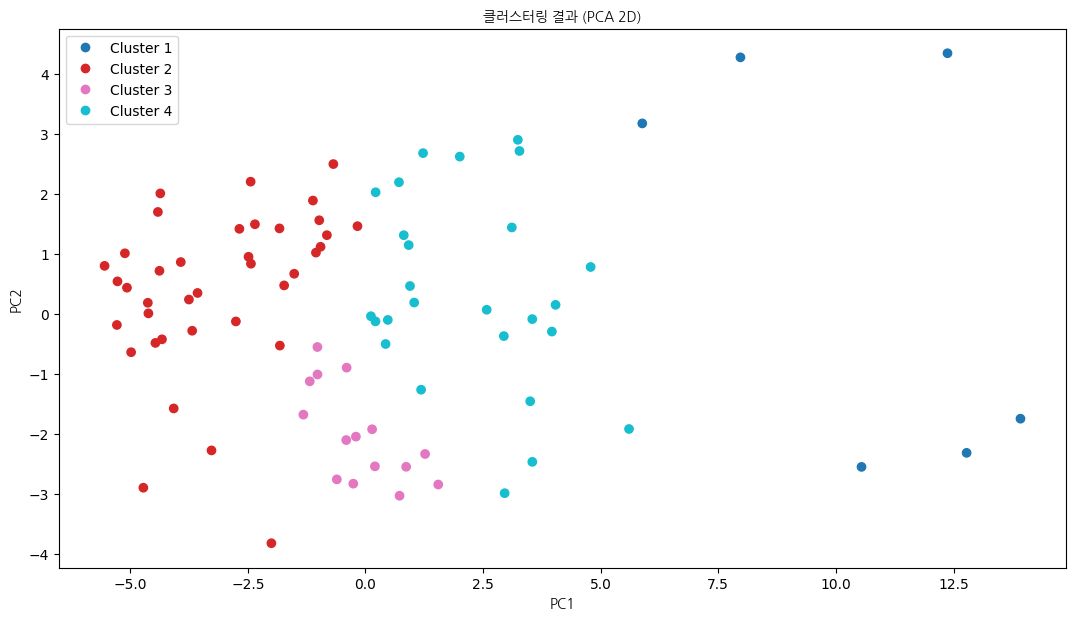

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc

# 데이터 준비
# data 변수에 사용될 데이터프레임을 미리 준비합니다.
# 예: data = pd.read_csv('your_data.csv')

# 라벨 인코딩
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# PCA를 이용한 차원 축소
pca = PCA(n_components=2)  # 2차원으로 축소
pca_data = pca.fit_transform(data)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# 계층적 클러스터링 수행 (ward 방법)
Z = linkage(pca_df, 'ward')

# 클러스터 수를 4로 설정하여 클러스터 레이블 추출
optimal_n_clusters = 4
cluster_labels = fcluster(Z, optimal_n_clusters, criterion='maxclust')

# 클러스터별 데이터 수 출력
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Cluster counts:", cluster_counts)

# 실루엣 계수 계산
silhouette_avg = silhouette_score(pca_df, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")

# 나눔고딕 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔고딕 폰트 경로 (시스템에 따라 경로가 다를 수 있습니다.)
# 나눔고딕 폰트 등록
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 덴드로그램 그리기 (클러스터별 색상 지정)
plt.figure(figsize=(13, 7))  # 그래프 크기 설정
dendrogram(Z, labels=cluster_labels, leaf_rotation=90., leaf_font_size=10.,
           color_threshold=Z[-optimal_n_clusters, 2])
plt.title('덴드로그램', fontsize=10, fontproperties=font_manager.FontProperties(fname=font_path))
plt.xlabel('샘플 인덱스', fontsize=10, fontproperties=font_manager.FontProperties(fname=font_path))
plt.ylabel('클러스터 거리', fontsize=10, fontproperties=font_manager.FontProperties(fname=font_path))
plt.show()

# 클러스터링 결과 시각화 (클러스터 색상 바꾸기)
plt.figure(figsize=(13, 7))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=cluster_labels, cmap='tab10', marker='o')
plt.title('클러스터링 결과 (PCA 2D)', fontsize=10, fontproperties=font_manager.FontProperties(fname=font_path))
plt.xlabel('PC1', fontsize=10, fontproperties=font_manager.FontProperties(fname=font_path))
plt.ylabel('PC2', fontsize=10, fontproperties=font_manager.FontProperties(fname=font_path))
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(1, optimal_n_clusters+1)])
plt.show()


In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score

# 예시로 k=4으로 클러스터링을 수행한 후 실루엣 계수를 계산합니다.
k = 4
cluster_labels = fcluster(Z, k, criterion='maxclust')

# 실루엣 계수 계산
silhouette_avg = silhouette_score(pca_df, cluster_labels)
print(f'전체 데이터의 평균 실루엣 계수: {silhouette_avg}')


전체 데이터의 평균 실루엣 계수: 0.3456620973213439


In [16]:

# 각 클러스터별 데이터 수 계산
cluster_counts = np.bincount(cluster_labels)
clusters = np.nonzero(cluster_counts)[0]

for cluster, count in zip(clusters, cluster_counts[clusters]):
    print(f'Cluster {cluster}: {count}개의 데이터')

Cluster 1: 6개의 데이터
Cluster 2: 38개의 데이터
Cluster 3: 15개의 데이터
Cluster 4: 26개의 데이터


In [17]:
data_cleaned

,회사 구분,회사 규모,기업 연매출,TYM 매출 비중,1.1 목적과 계획의 명확성,1.2 변화관리,1.3 경영자 리더십,1.4 디지털화 전담조직,1.5 디지털화 전략,2.1 데이터 관리,...,5.3 업무 자동화,6.1 고객과의 의사소통,6.2 공급자와의 협력,7.1 업무 효율성,7.2 고객 만족도,7.3 비즈니스 모델 혁신,7.4 매출 증대,7.5 운용 비용,7.6 소통 비용,7.7 디지털 투명성
0,1,1,3,0,2,3,5,3,2,3,...,2,2,2,3,3,2,3,3,3,2
1,1,1,2,2,2,3,2,1,2,3,...,2,2,1,2,1,2,1,2,1,1
2,1,1,2,0,2,2,2,2,2,2,...,2,2,1,2,2,1,2,2,2,2
3,1,1,3,0,2,2,2,1,2,3,...,2,2,2,3,3,2,3,2,2,2
4,1,1,3,0,1,2,2,1,1,3,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,2,3,2,3,2,2,2,2,...,1,2,2,2,2,2,2,1,1,1
81,0,0,3,0,2,3,5,2,2,3,...,2,2,3,4,3,2,3,4,5,1
82,1,0,4,0,2,2,3,1,2,3,...,2,2,1,4,3,2,3,2,2,2
83,1,1,5,2,1,2,2,2,2,2,...,1,2,2,2,2,1,1,2,2,1


In [18]:
import pandas as pd

data_cleaned = pd.DataFrame(data)

# List of columns to drop
columns_to_drop = ['회사 업종', '상시 근로자수', '응답자 소속 부서', '응답자 직위']

# Drop the specified columns
data_cleaned.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print(data_cleaned)



    회사 구분  회사 규모  기업 연매출  TYM 매출 비중  1.1 목적과 계획의 명확성  1.2 변화관리  1.3 경영자 리더십  \
0       1      1       3          0                2         3            5   
1       1      1       2          2                2         3            2   
2       1      1       2          0                2         2            2   
3       1      1       3          0                2         2            2   
4       1      1       3          0                1         2            2   
..    ...    ...     ...        ...              ...       ...          ...   
80      0      1       2          3                2         3            2   
81      0      0       3          0                2         3            5   
82      1      0       4          0                2         2            3   
83      1      1       5          2                1         2            2   
84      0      1       2          3                2         2            2   

    1.4 디지털화 전담조직  1.5 디지털화 전략  2.1 데이터 관리  ...  5.

항목별 평균점수


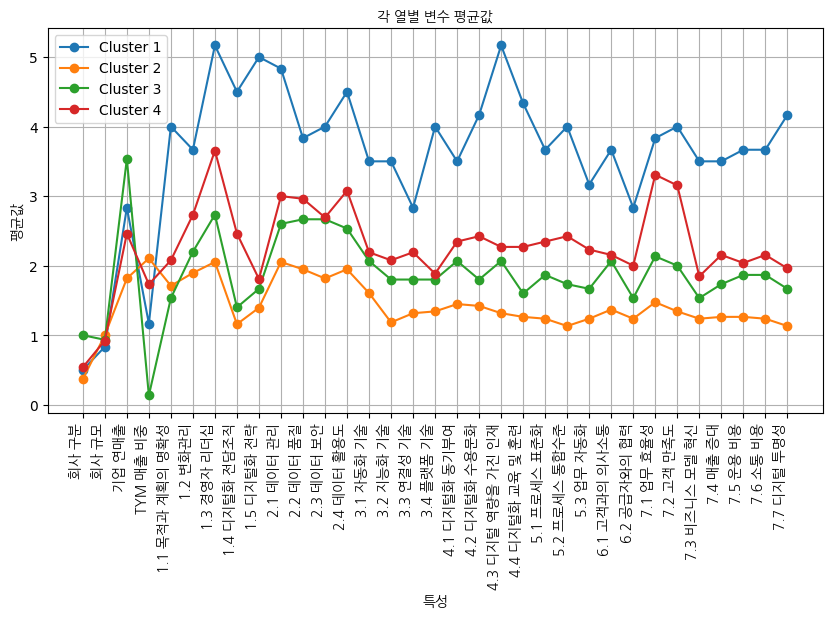

In [22]:
# 각 클러스터별 변수 평균값 계산
cluster_means = data_cleaned.groupby('Cluster').mean()

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 5))
for cluster_id in cluster_means.index:
    plt.plot(cluster_means.columns, cluster_means.loc[cluster_id], marker='o', label=f'Cluster {cluster_id}')

plt.title('각 열별 변수 평균값', fontproperties=font_manager.FontProperties(fname=font_path))
plt.xlabel('특성', fontproperties=font_manager.FontProperties(fname=font_path))
plt.ylabel('평균값', fontproperties=font_manager.FontProperties(fname=font_path))
plt.xticks(rotation=90, ha='right', fontsize=10,fontproperties=font_manager.FontProperties(fname=font_path))
plt.legend()
plt.grid(True)
plt.show()



수치형 평균점수


# 범주형


In [21]:
data_cleaned

,회사 구분,회사 규모,기업 연매출,TYM 매출 비중,1.1 목적과 계획의 명확성,1.2 변화관리,1.3 경영자 리더십,1.4 디지털화 전담조직,1.5 디지털화 전략,2.1 데이터 관리,...,6.1 고객과의 의사소통,6.2 공급자와의 협력,7.1 업무 효율성,7.2 고객 만족도,7.3 비즈니스 모델 혁신,7.4 매출 증대,7.5 운용 비용,7.6 소통 비용,7.7 디지털 투명성,Cluster
0,1,1,3,0,2,3,5,3,2,3,...,2,2,3,3,2,3,3,3,2,4
1,1,1,2,2,2,3,2,1,2,3,...,2,1,2,1,2,1,2,1,1,2
2,1,1,2,0,2,2,2,2,2,2,...,2,1,2,2,1,2,2,2,2,3
3,1,1,3,0,2,2,2,1,2,3,...,2,2,3,3,2,3,2,2,2,3
4,1,1,3,0,1,2,2,1,1,3,...,1,1,1,1,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,2,3,2,3,2,2,2,2,...,2,2,2,2,2,2,1,1,1,2
81,0,0,3,0,2,3,5,2,2,3,...,2,3,4,3,2,3,4,5,1,4
82,1,0,4,0,2,2,3,1,2,3,...,2,1,4,3,2,3,2,2,2,3
83,1,1,5,2,1,2,2,2,2,2,...,2,2,2,2,1,1,2,2,1,3


   회사 구분  회사 규모  기업 연매출  TYM 매출 비중  1.1 목적과 계획의 명확성  1.2 변화관리  1.3 경영자 리더십  \
0      1      1       3          0                2         3            5   
1      1      1       2          2                2         3            2   
2      1      1       2          0                2         2            2   
3      1      1       3          0                2         2            2   
4      1      1       3          0                1         2            2   

   1.4 디지털화 전담조직  1.5 디지털화 전략  2.1 데이터 관리  ...  6.1 고객과의 의사소통  6.2 공급자와의 협력  \
0              3            2           3  ...              2             2   
1              1            2           3  ...              2             1   
2              2            2           2  ...              2             1   
3              1            2           3  ...              2             2   
4              1            1           3  ...              1             1   

   7.1 업무 효율성  7.2 고객 만족도  7.3 비즈니스 모델 혁신  7.4 매출 증대  7.

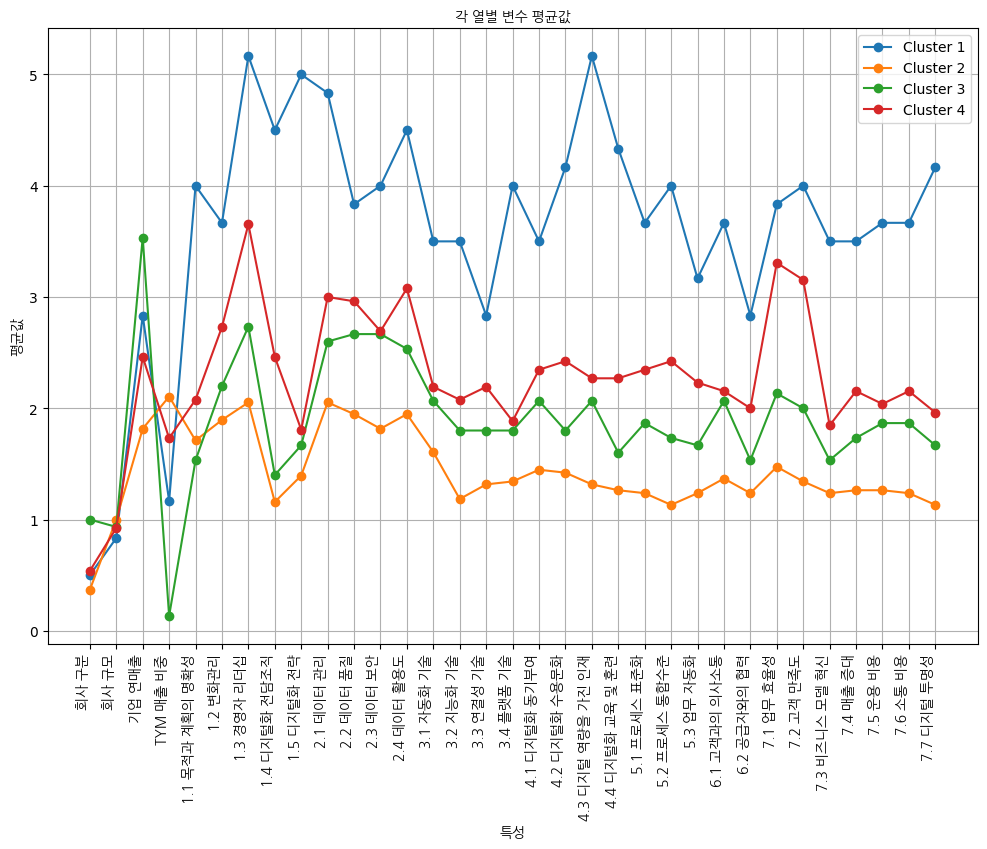

Cluster 1: 6개의 데이터
Cluster 2: 38개의 데이터
Cluster 3: 15개의 데이터
Cluster 4: 26개의 데이터


In [23]:
# 데이터프레임에 클러스터 레이블 추가
data_cleaned['Cluster'] = cluster_labels

# 클러스터 레이블이 추가된 데이터프레임 출력
print(data_cleaned.head())

# 필요 없는 열 제거
columns_to_drop_after = ["상시 근로자수", "응답자 소속 부서", "응답자 직위", "회사 업종"]
data_cleaned = data_cleaned.drop(columns=columns_to_drop_after, errors='ignore')

# 클러스터별 항목별 평균 점수 계산 및 꺾은선 그래프 그리기
cluster_means = data_cleaned.groupby('Cluster').mean()

# 꺾은선 그래프 그리기
plt.figure(figsize=(12, 8))
for cluster_id in cluster_means.index:
    plt.plot(cluster_means.columns, cluster_means.loc[cluster_id], marker='o', label=f'Cluster {cluster_id}')

plt.title('각 열별 변수 평균값', fontproperties=font_manager.FontProperties(fname=font_path))
plt.xlabel('특성', fontproperties=font_manager.FontProperties(fname=font_path))
plt.ylabel('평균값', fontproperties=font_manager.FontProperties(fname=font_path))
plt.xticks(rotation=90, ha='right', fontsize=10, fontproperties=font_manager.FontProperties(fname=font_path))
plt.legend()
plt.grid(True)
plt.show()
cluster_counts = np.bincount(cluster_labels)
clusters = np.nonzero(cluster_counts)[0]

for cluster, count in zip(clusters, cluster_counts[clusters]):
    print(f'Cluster {cluster}: {count}개의 데이터')

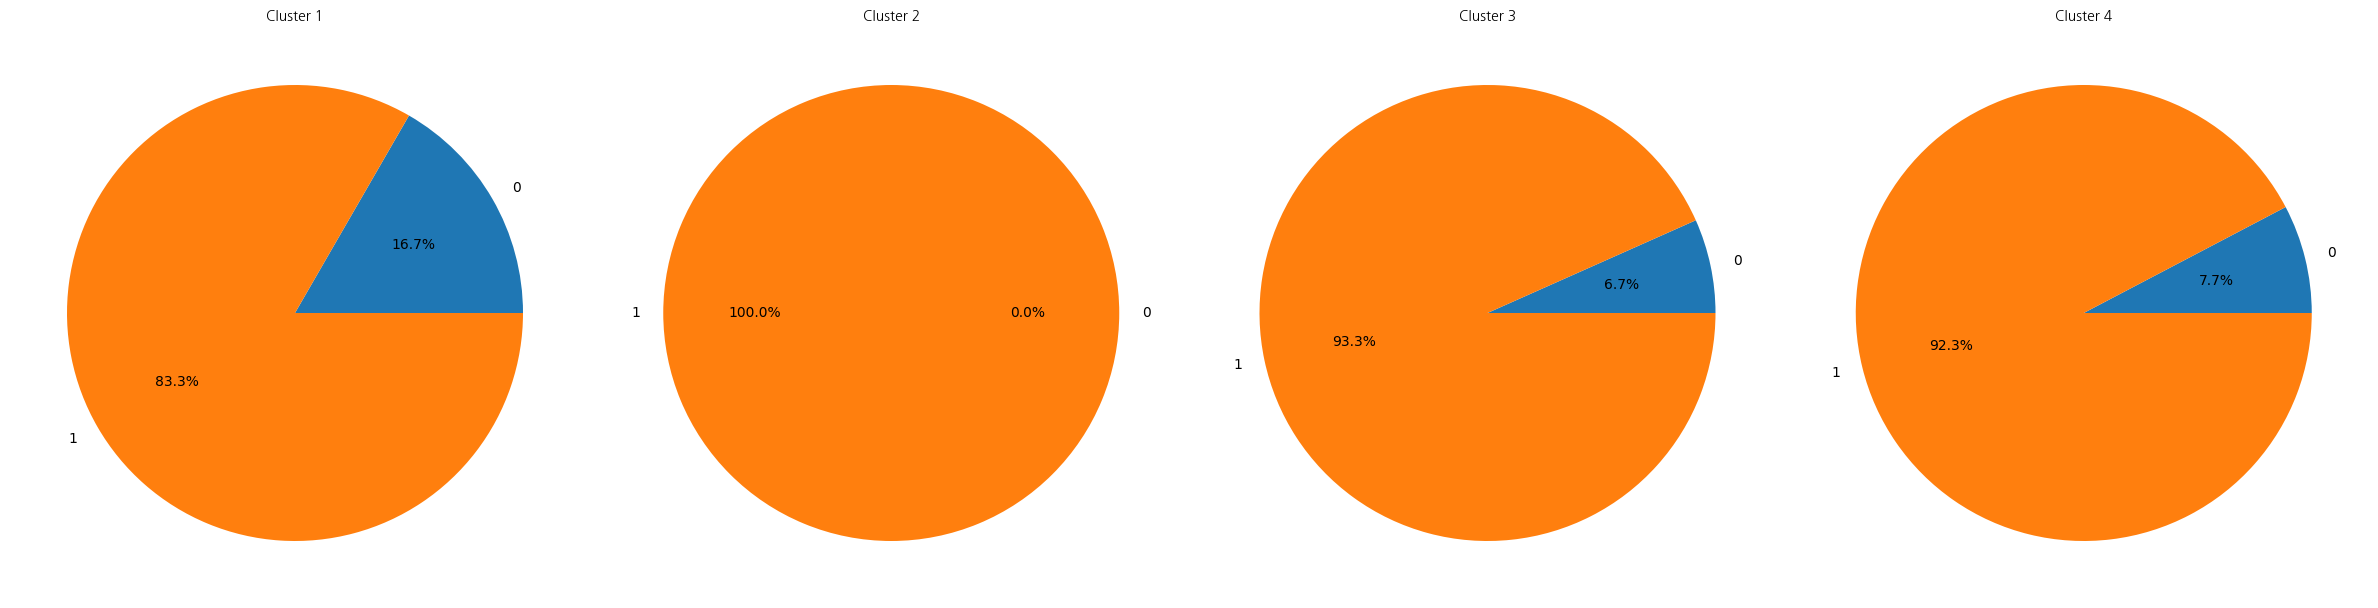

Cluster 1: 6개의 데이터
Cluster 2: 38개의 데이터
Cluster 3: 15개의 데이터
Cluster 4: 26개의 데이터


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import font_manager, rc

# 클러스터별 '회사 규모' 데이터 비율 계산
cluster_company_counts = data_cleaned.groupby(['Cluster', '회사 규모']).size().unstack(fill_value=0)
cluster_company_ratios = cluster_company_counts.apply(lambda x: x / x.sum(), axis=1)

# 나눔고딕 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔고딕 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파이 차트 한 행에 그리기
plt.figure(figsize=(24, 6))  # 전체 차트 크기 조정
for i, cluster in enumerate(cluster_company_ratios.index):
    plt.subplot(1, len(cluster_company_ratios.index), i + 1)  # 한 행에 클러스터 수만큼 차트 배치
    plt.pie(cluster_company_ratios.loc[cluster], labels=cluster_company_ratios.columns, autopct='%1.1f%%')
    plt.title(f'Cluster {cluster}', fontproperties=font_manager.FontProperties(fname=font_path))

plt.tight_layout()
plt.show()

# 클러스터 별 데이터 개수 출력
cluster_counts = np.bincount(cluster_labels)
clusters = np.nonzero(cluster_counts)[0]

for cluster, count in zip(clusters, cluster_counts[clusters]):
    print(f'Cluster {cluster}: {count}개의 데이터')


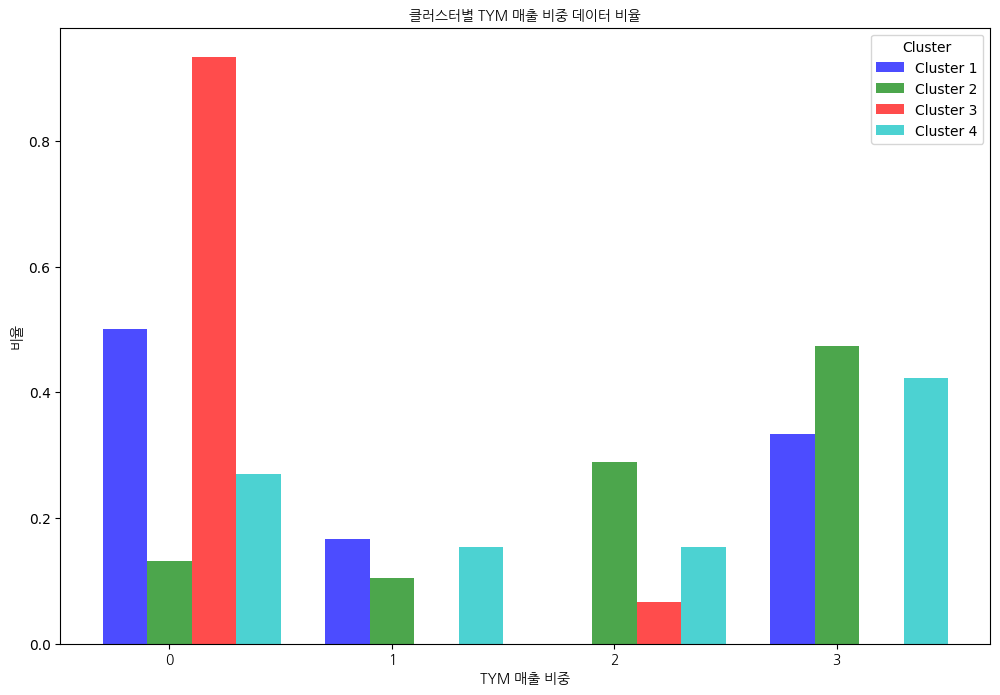

Cluster 1: 6개의 데이터
Cluster 2: 38개의 데이터
Cluster 3: 15개의 데이터
Cluster 4: 26개의 데이터


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc

# 나눔고딕 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔고딕 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 클러스터별 'TYM 매출 비중' 데이터 수 세기
cluster_tym_counts = data_cleaned.groupby(['TYM 매출 비중', 'Cluster']).size().unstack(fill_value=0)

# 클러스터별 'TYM 매출 비중' 데이터 비율 계산
cluster_tym_ratios = cluster_tym_counts.apply(lambda x: x / x.sum(), axis=0)

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # 다양한 색상 리스트
width = 0.2  # 막대의 폭
x = np.arange(len(cluster_tym_ratios.index))  # x축의 위치

for i, cluster in enumerate(cluster_tym_ratios.columns):
    plt.bar(x + (i * width), cluster_tym_ratios[cluster], width=width, alpha=0.7, label=f'Cluster {cluster}', color=colors[i % len(colors)])

plt.title('클러스터별 TYM 매출 비중 데이터 비율', fontproperties=font_manager.FontProperties(fname=font_path))
plt.xlabel('TYM 매출 비중', fontproperties=font_manager.FontProperties(fname=font_path))
plt.ylabel('비율', fontproperties=font_manager.FontProperties(fname=font_path))
plt.xticks(x + width, cluster_tym_ratios.index, fontproperties=font_manager.FontProperties(fname=font_path))
plt.legend(title='Cluster')
plt.show()
# 클러스터 별 데이터 개수 출력
cluster_counts = np.bincount(cluster_labels)
clusters = np.nonzero(cluster_counts)[0]

for cluster, count in zip(clusters, cluster_counts[clusters]):
    print(f'Cluster {cluster}: {count}개의 데이터')

In [ ]:

# 클러스터별 '기업 연매출' 데이터 수 세기
cluster_revenue_counts = data_cleaned.groupby(['기업 연매출', 'Cluster']).size().unstack(fill_value=0)

# 클러스터별 '기업 연매출' 데이터 비율 계산
cluster_revenue_ratios = cluster_revenue_counts.apply(lambda x: x / x.sum(), axis=0)

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # 다양한 색상 리스트
width = 0.2  # 막대의 폭
x = np.arange(len(cluster_revenue_ratios.index))  # x축의 위치

for i, cluster in enumerate(cluster_revenue_ratios.columns):
    plt.bar(x + (i * width), cluster_revenue_ratios[cluster], width=width, alpha=0.7, label=f'Cluster {cluster}', color=colors[i % len(colors)])

plt.title('클러스터별 기업 연매출 데이터 비율', fontproperties=font_manager.FontProperties(fname=font_path))
plt.xlabel('기업 연매출', fontproperties=font_manager.FontProperties(fname=font_path))
plt.ylabel('비율', fontproperties=font_manager.FontProperties(fname=font_path))
plt.xticks(x + width * 2, cluster_revenue_ratios.index, fontproperties=font_manager.FontProperties(fname=font_path))
plt.legend(title='Cluster')
plt.show()

In [ ]:
# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral']  # 다양한 색상 리스트
width = 0.2  # 막대의 폭
x = np.arange(len(cluster_revenue_ratios.index))  # x축의 위치

for i, cluster in enumerate(cluster_revenue_ratios.columns):
    plt.bar(x + (i * width), cluster_revenue_ratios[cluster], width=width, alpha=0.7, label=f'Cluster {cluster}', color=colors[i % len(colors)])

plt.title('클러스터별 기업 연매출 데이터 비율', fontproperties=font_manager.FontProperties(fname=font_path))
plt.xlabel('기업 연매출', fontproperties=font_manager.FontProperties(fname=font_path))
plt.ylabel('비율', fontproperties=font_manager.FontProperties(fname=font_path))
plt.xticks(x + width * 2, cluster_revenue_ratios.index, fontproperties=font_manager.FontProperties(fname=font_path))
plt.legend(title='Cluster')
plt.show()


In [ ]:
# data_cleaned에서 기업 연매출 데이터의 각 범주별 개수 확인
revenue_counts = data_cleaned['기업 연매출'].value_counts()

print("기업 연매출 데이터의 각 범주별 개수:")
print(revenue_counts)
